# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [5]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python_headless-4.5.3.56-cp37-cp37m-manylinux2014_x86_64.whl (37.1 MB)
  Using cached bokeh-2.1.1.tar.gz (19.3 MB)
  Using cached torchvision-0.12.0-cp37-cp37m-manylinux1_x86_64.whl (21.0 MB)
  Using cached tqdm-4.63.0-py2.py3-none-any.whl (76 kB)
  Using cached ipywidgets-7.7.0-py2.py3-none-any.whl (123 kB)
  Using cached livelossplot-0.5.4-py3-none-any.whl (22 kB)
  Using cached pytest-7.1.1-py3-none-any.whl (297 kB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     |████████████████████████████████| 109 kB 985 kB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 74.8 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 78.0 

     |████████████████████████████████| 93 kB 2.7 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=56feaf90e1d262217cb4633ae5b6e10fb03313fd48a222744ba85fa1937dc21a
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

In [9]:
pip install ipywidgets --upgrade

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 9.7 MB/s eta 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.7
    Uninstalling widgetsnbextension-3.6.7:
      Successfully uninstalled widgetsnbextension-3.6.7
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.0
    Uninstalling ipywidgets-7.7.0:
      Successfully uninstalled ipywidgets-7.7.0
Note: you may need to restart the kernel to use updated packages.


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
from torch.utils.data import DataLoader, random_split
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
## YOUR CODE HERE ##
full_training_data = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)

train_size = int(0.8 * len(full_training_data))
val_size = len(full_training_data) - train_size

# Training data and validation data
training_data, val_data = random_split(full_training_data, [train_size, val_size])

# Traning and validation dataloaders
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=32)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I first converted the dataset entries to tensors. Then I normalized the tensors in specific ranges as they represented image pixels. I had only gray-scale images so the normalized was done accordingly.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


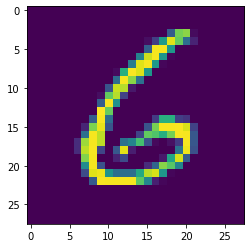

5


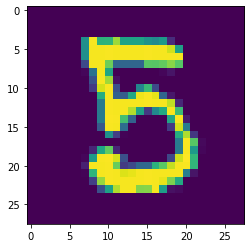

4


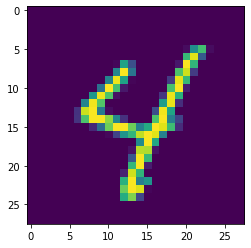

2


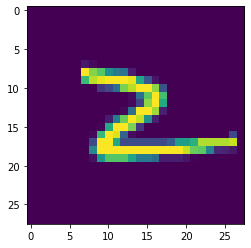

2


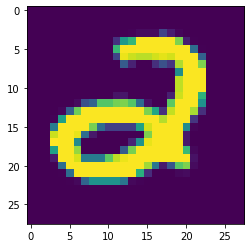

In [5]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
## YOUR CODE HERE ##
class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28 * 1, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
network = MNISTNet()
network

MNISTNet(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
## YOUR CODE HERE ##
optimizer = optim.Adam(network.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [9]:
network.to(device)

MNISTNet(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [10]:
# Training function
def train_model(network, train_loader, valid_loader, criterion, optimizer, num_epochs):
    train_loss_history = []
    val_loss_history = []
    
    for epoch in range(num_epochs):
        network.train()
        train_loss = 0.0
        train_correct = 0
        for i, data in enumerate(train_loader):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = network(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).float().mean().item()
            train_loss += loss.item()
        
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss/len(train_loader))

        val_loss = 0.0
        val_correct = 0
        network.eval()
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = network(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).float().mean().item()
            val_loss += loss.item()
        
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(valid_loader):.2f}% validation loss: {val_loss/len(valid_loader):.5f}')
        val_loss_history.append(val_loss/len(valid_loader))

    return train_loss_history, val_loss_history

In [11]:
# Number of epochs
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

train_loss_history, val_loss_history = train_model(network, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch 1 training accuracy: 0.89% training loss: 0.37234
Epoch 1 validation accuracy: 0.93% validation loss: 0.23668
Epoch 2 training accuracy: 0.95% training loss: 0.17903
Epoch 2 validation accuracy: 0.95% validation loss: 0.16846
Epoch 3 training accuracy: 0.96% training loss: 0.13805
Epoch 3 validation accuracy: 0.96% validation loss: 0.13582
Epoch 4 training accuracy: 0.96% training loss: 0.11362
Epoch 4 validation accuracy: 0.96% validation loss: 0.13140
Epoch 5 training accuracy: 0.97% training loss: 0.09683
Epoch 5 validation accuracy: 0.96% validation loss: 0.12602
Epoch 6 training accuracy: 0.97% training loss: 0.08567
Epoch 6 validation accuracy: 0.96% validation loss: 0.12017
Epoch 7 training accuracy: 0.98% training loss: 0.07626
Epoch 7 validation accuracy: 0.96% validation loss: 0.12970
Epoch 8 training accuracy: 0.98% training loss: 0.06962
Epoch 8 validation accuracy: 0.97% validation loss: 0.11230
Epoch 9 training accuracy: 0.98% training loss: 0.06315
Epoch 9 validati

Plot the training loss (and validation loss/accuracy, if recorded).

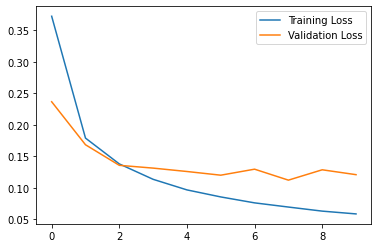

In [12]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [13]:
## YOUR CODE HERE ##
# Function to compute test accuracy
def compute_test_accuracy(loader, model):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to track gradients during evaluation
        for data in loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Compute and print test accuracy
test_accuracy = compute_test_accuracy(test_loader, network)
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 97.02%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [14]:
class MNISTNetNew(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28 * 1, 480)
        self.bn1 = nn.BatchNorm1d(480)  # Add batch normalization layers
        self.fc2 = nn.Linear(480, 240)
        self.bn2 = nn.BatchNorm1d(240)   
        self.fc3 = nn.Linear(240, 120)
        self.bn3 = nn.BatchNorm1d(120)
        self.fc4 = nn.Linear(120, 84)
        self.bn4 = nn.BatchNorm1d(84)  
        self.fc5 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.bn1(self.fc1(x)))  # Apply batch normalization and activation
        x = self.activation(self.bn2(self.fc2(x)))
        x = self.activation(self.bn3(self.fc3(x))) 
        x = self.activation(self.bn4(self.fc4(x)))  
        x = self.fc5(x)
        return x

In [22]:
## YOUR CODE HERE ##

# Increase the batch size

train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Initialize the model

network = MNISTNetNew().to(device)

criterion = nn.CrossEntropyLoss()

# Lower the learning rate
optimizer = optim.Adam(network.parameters(), lr=0.001)

# increase the number of epochs
num_epochs = 20

train_loss_history_new = list()
val_loss_history_new = list()

train_loss_history_new, val_loss_history_new = train_model(network, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch 1 training accuracy: 0.93% training loss: 0.24662
Epoch 1 validation accuracy: 0.97% validation loss: 0.11424
Epoch 2 training accuracy: 0.97% training loss: 0.10632
Epoch 2 validation accuracy: 0.97% validation loss: 0.10184
Epoch 3 training accuracy: 0.98% training loss: 0.07540
Epoch 3 validation accuracy: 0.97% validation loss: 0.08808
Epoch 4 training accuracy: 0.98% training loss: 0.05951
Epoch 4 validation accuracy: 0.97% validation loss: 0.08468
Epoch 5 training accuracy: 0.98% training loss: 0.04776
Epoch 5 validation accuracy: 0.98% validation loss: 0.08243
Epoch 6 training accuracy: 0.99% training loss: 0.04155
Epoch 6 validation accuracy: 0.98% validation loss: 0.08311
Epoch 7 training accuracy: 0.99% training loss: 0.03486
Epoch 7 validation accuracy: 0.97% validation loss: 0.09729
Epoch 8 training accuracy: 0.99% training loss: 0.03117
Epoch 8 validation accuracy: 0.98% validation loss: 0.08734
Epoch 9 training accuracy: 0.99% training loss: 0.02581
Epoch 9 validati

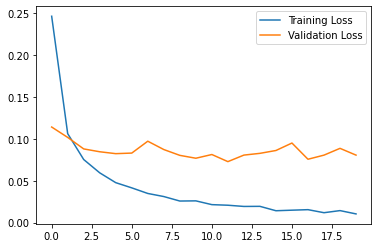

In [23]:
# Plot the training and validation loss history
plt.plot(train_loss_history_new, label="Training Loss")
plt.plot(val_loss_history_new, label="Validation Loss")
plt.legend()
plt.show()

In [24]:
test_accuracy = compute_test_accuracy(test_loader, network)
print(f'Final Test Accuracy: {test_accuracy:.2f}%')

Final Test Accuracy: 98.11%


## Saving your model
Using `torch.save`, save your model for future loading.

In [25]:
## YOUR CODE HERE ##
def save_model(model, path):
    torch.save(model.state_dict(), path)

In [26]:
# Specify the path where you want to save the model
model_save_path = 'mnist_cnn.pth'

# Save the model
save_model(network, model_save_path)

print(f'Model saved to {model_save_path}')

Model saved to mnist_cnn.pth
